In [41]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Carga de Datos

Nota: A partir del c13 al c18 son duplicados

In [42]:

conjuntoImgs = []
conjuntoGris = []
conjuntoBin = []
labels_y = []

for i in range(1, 19):
    for j in range(10):
        ruta = f'Prueba/C{i}/N{j}.JPG'
        temp = cv2.imread(ruta)

        temp = cv2.resize(temp, (32, 64))
        conjuntoImgs.append(temp)
        
        temp_gris = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        conjuntoGris.append(temp_gris)
        
        _, temp_bin = cv2.threshold(temp_gris, 127, 1, cv2.THRESH_BINARY)
        conjuntoBin.append(temp_bin)
    
        labels_y.append(j)

# Convertir las listas en arrays de numpy
conjuntoImgs = np.array(conjuntoImgs)
conjuntoGris = np.array(conjuntoGris)
conjuntoBin = np.array(conjuntoBin)
labels_y = np.array(labels_y)
# conjuntoImgs = np.array(conjuntoImgs).reshape(1,1105920)
# conjuntoGris = np.array(conjuntoGris).reshape(1,368640)
# conjuntoBin = np.array(conjuntoBin).reshape(1,368640)


# Imprimir las formas de los arrays para confirmar
print("Tamaño de conjuntoImgs:", conjuntoImgs.shape)
print("Tamaño de conjuntoGris:", conjuntoGris.shape)
print("Tamaño de conjuntoBin:", conjuntoBin.shape)
print("Tamaño de labels_y:", labels_y.shape)



Tamaño de conjuntoImgs: (180, 64, 32, 3)
Tamaño de conjuntoGris: (180, 64, 32)
Tamaño de conjuntoBin: (180, 64, 32)
Tamaño de labels_y: (180,)


### Declaración de funciones

In [43]:
# Definiendo funcion de activacion

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

def tanh(x):
    return np.tanh(x)

# Aplicando el Feed forward de la red neuronal
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# Oculta
	z1 = x.dot(w1)# Entrada de la capa 1 (oculta)
	a1 = tanh(z1)# Salia para la entrada de la capa 2
	
	# Capa de salida
	z2 = a1.dot(w2)# entrada de la capa 2 o de salida
	a2 = tanh(z2)# salida de la capa
	return(a2)

# Generacion aleatoria de pesos
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# cálculo de la perdida con mean square error(MSE)
def loss(out, y):
	s =(np.square(out-y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# capa oculta
	z1 = x.dot(w1)# entrada de la capa 1
	a1 = tanh(z1)# entrada de la capa 2 (salida)
	
	# capa de salida
	z2 = a1.dot(w2)# entrada de la capa de salida
	a2 = tanh(z2)# salida de la capa de salida
	# error en la capa de salida
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))

	# Gradiente para w1 y w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Actualizando parámetros
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	
	print("El numero en la imagen es el:")
	match(k):
		case 0:
			print("0")
		case 1:
			print("1")
		case 2:
			print("2")
		case 3:
			print("3")
		case 4:
			print("4")
		case 5:
			print("5")
		case 6:
			print("6")
		case 7:
			print("7")
		case 8:
			print("8")
		case 9:
			print("9")
			
	plt.imshow(x.reshape(64,32))
	plt.show() 

### Partición de los datos

In [44]:
X_train_RGB, X_test_RGB, Y_train_RGB, Y_test_RGB = train_test_split(conjuntoImgs, labels_y, test_size = 0.2)
X_train_Gris, X_test_Gris, Y_train_Gris, Y_test_Gris = train_test_split(conjuntoGris, labels_y, test_size = 0.2)
X_train_Bin, X_test_Bin, Y_train_Bin, Y_test_Bin = train_test_split(conjuntoBin, labels_y, test_size = 0.2)

X_train_RGB = X_train_RGB.reshape(144, 1, -1)  
X_test_RGB = X_test_RGB.reshape(36, 1, -1)  
Y_train_RGB = Y_train_RGB.reshape(144, 1, -1)
Y_test_RGB = Y_test_RGB.reshape(36, 1, -1)

X_train_Gris = X_train_Gris.reshape(144, 1, -1)  
X_test_Gris = X_test_Gris.reshape(36, 1, -1)  
Y_train_Gris = Y_train_RGB.reshape(144, 1, -1)
Y_test_Gris = Y_test_RGB.reshape(36, 1, -1)

X_train_Bin = X_train_Bin.reshape(144, 1, -1)  
X_test_Bin = X_test_Bin.reshape(36, 1, -1)
Y_train_Bin = Y_train_RGB.reshape(144, 1, -1)
Y_test_Bin = Y_test_RGB.reshape(36, 1, -1)  

In [45]:

# Imprimir las formas de las variables
print("Shape de X_train_RGB:", X_train_RGB.shape)
print("Shape de X_test_RGB:", X_test_RGB.shape)

print("Shape de X_train_Gris:", X_train_Gris.shape)
print("Shape de X_test_Gris:", X_test_Gris.shape)

print("Shape de X_train_Bin:", X_train_Bin.shape)
print("Shape de X_test_Bin:", X_test_Bin.shape)

Shape de X_train_RGB: (144, 1, 6144)
Shape de X_test_RGB: (36, 1, 6144)
Shape de X_train_Gris: (144, 1, 2048)
Shape de X_test_Gris: (36, 1, 2048)
Shape de X_train_Bin: (144, 1, 2048)
Shape de X_test_Bin: (36, 1, 2048)


### Generación de los pesos

In [46]:
w1_RGB = generate_wt(6144, 5)
w2_RGB = generate_wt(5, 10)
print(w1_RGB, "\n\n", w2_RGB)

[[ 1.28821996e+00  6.02379359e-01 -1.22401186e+00  3.95003386e-01
  -9.88947346e-01]
 [-9.79730209e-01 -1.14420873e-01  3.46614889e-01 -3.68765052e-01
  -9.20156581e-02]
 [-1.87979976e+00 -1.06587829e-03 -7.27302836e-01 -1.72611198e-01
  -1.45792489e+00]
 ...
 [-2.38028638e+00 -5.51255752e-01  6.02846388e-01 -1.38384613e-01
  -5.63954215e-01]
 [-1.59023954e+00  1.41209061e-02 -5.59190374e-01  1.83335424e+00
   8.44751032e-02]
 [ 8.07797449e-01 -2.77689977e-01 -5.12205275e-01  2.07479492e+00
  -1.06631939e+00]] 

 [[ 7.16090529e-01 -1.46377190e+00  1.56088722e+00  1.38132178e+00
  -1.54317591e-01  2.87378136e-02 -9.16021542e-01 -7.89298431e-01
   4.75851051e-01 -8.40943101e-01]
 [-1.71828614e-01 -2.76027447e-01  8.22771459e-02  6.60201660e-02
  -2.20190287e-01  2.27767153e-01 -8.36145902e-01 -5.82726970e-01
  -7.55944710e-01 -5.26899582e-01]
 [ 3.78271775e-01 -1.03015236e+00  6.30064254e-01  2.00698739e-01
  -1.39762340e+00  1.89788779e+00  1.01130861e+00 -1.41474295e+00
  -1.10579159e+

In [47]:
w1_Gris = generate_wt(2048, 5)
w2_Gris = generate_wt(5, 10)
print(w1_Gris, "\n\n", w2_Gris)

[[-0.095258    1.33394165  0.78435095 -0.85835507 -1.27899596]
 [ 0.41619629  0.41304235 -0.66975816 -2.21724493  0.04260219]
 [ 0.15462683  0.99723845 -0.42580602 -1.51047005 -0.50489871]
 ...
 [-0.38807479  0.18571593 -1.0865371  -0.72271531 -0.75822952]
 [-0.91951487  0.80964096 -0.69978892 -0.24146219 -0.07621763]
 [ 1.57845031 -0.09351548 -0.24811021 -1.27400736 -0.04397004]] 

 [[-1.05567515 -0.8637313  -2.30546141  0.74685966  0.15268827  0.73853367
   0.07813531 -1.07606497 -2.99380248  1.2333139 ]
 [-0.35156469  0.33228914 -2.22189937  0.22608452 -0.3525642  -0.80431248
  -0.78978162  1.03864188  0.90670987  0.81868951]
 [-0.62261589  0.58733876  1.95031835  0.20943022 -0.32302317  0.53097365
  -0.32819597 -1.50095253 -0.15643665 -1.10817141]
 [-0.96774878 -0.97965627  1.0106812  -0.49655764  1.27567015  2.36333758
   0.6854115   0.02610188  2.05677904  0.92568115]
 [-0.73979142 -0.49362257 -0.72184881  0.83875944 -1.8924965   0.30443156
  -0.18661552 -1.85471986 -0.7350714   

In [48]:
w1_Bin = generate_wt(2048, 5)
w2_Bin = generate_wt(5, 10)
print(w1_Bin, "\n\n", w2_Bin)

[[-0.99228715  0.50575259  0.33675851  0.20370142  1.17006262]
 [ 0.26783997 -0.84295483  1.00967679 -1.0148231   0.05050207]
 [ 0.65186596 -1.9821743   0.64337242  0.81396107 -1.40806196]
 ...
 [-2.2299581   1.0530965  -0.89929484  0.78220283 -0.18692733]
 [-1.24390041 -0.06082494 -0.74834187 -1.54980958 -0.49295002]
 [-0.81130678  0.63868385 -0.49723604 -1.2353044   1.29539176]] 

 [[ 0.16335845 -0.06273362  0.05495055  1.15260977 -0.15521148 -0.96762785
  -0.81805169 -1.1077967   0.57592552 -0.79477269]
 [-1.59930661 -0.20588148 -0.51878225 -1.19363077  1.53344895  0.3283124
  -0.96865961  0.09900907  0.14138525 -0.6796004 ]
 [-0.01147818  0.09466128 -0.12745799 -0.12108658  0.39326488 -0.43554472
  -0.34068698  1.08077914  0.9542351  -0.65939788]
 [ 0.60196449  0.20096074 -1.06715114 -0.1435419   0.08729843 -1.41884619
   1.6379875  -0.79025527 -0.68723324  1.11554242]
 [-0.17023998  0.86735323 -0.05170582  0.99397529 -0.52023179  0.88947961
   0.02269472 -0.83736468 -0.81462918  0

### Entrenamiento de las redes

##### RBG

In [49]:
acc_RGB, losss_RGB, w1_RGB, w2_RGB = train(X_train_RGB, Y_train_RGB, w1_RGB, w2_RGB, 0.1, 10)

epochs: 1 ======== acc: -21087.934098058544
epochs: 2 ======== acc: -20698.611111111113
epochs: 3 ======== acc: -20698.611111111113
epochs: 4 ======== acc: -20698.611111111113
epochs: 5 ======== acc: -20698.611111111113
epochs: 6 ======== acc: -20698.611111111113
epochs: 7 ======== acc: -20698.611111111113
epochs: 8 ======== acc: -20698.611111111113
epochs: 9 ======== acc: -20698.611111111113
epochs: 10 ======== acc: -20698.611111111113


##### Escala de Grises

In [50]:
acc_Gris, losss_Gris, w1_Gris, w2_Gris = train(X_train_Gris, Y_train_Gris, w1_Gris, w2_Gris, 0.1, 10)

epochs: 1 ======== acc: -21042.7188858751
epochs: 2 ======== acc: -20698.611111111113
epochs: 3 ======== acc: -20698.611111111113
epochs: 4 ======== acc: -20698.611111111113
epochs: 5 ======== acc: -20698.611111111113
epochs: 6 ======== acc: -20698.611111111113
epochs: 7 ======== acc: -20698.611111111113
epochs: 8 ======== acc: -20698.611111111113
epochs: 9 ======== acc: -20698.611111111113
epochs: 10 ======== acc: -20698.611111111113


##### Binario

In [51]:
acc_Bin, losss_Bin, w1_Bin, w2_Bin = train(X_train_Bin, Y_train_Bin, w1_Bin, w2_Bin, 0.1, 10)

epochs: 1 ======== acc: -21098.810349653606
epochs: 2 ======== acc: -20698.611111111113
epochs: 3 ======== acc: -20698.611111111113
epochs: 4 ======== acc: -20698.611111111113
epochs: 5 ======== acc: -20698.611111111113
epochs: 6 ======== acc: -20698.611111111113
epochs: 7 ======== acc: -20698.611111111113
epochs: 8 ======== acc: -20698.611111111113
epochs: 9 ======== acc: -20698.611111111113
epochs: 10 ======== acc: -20698.611111111113


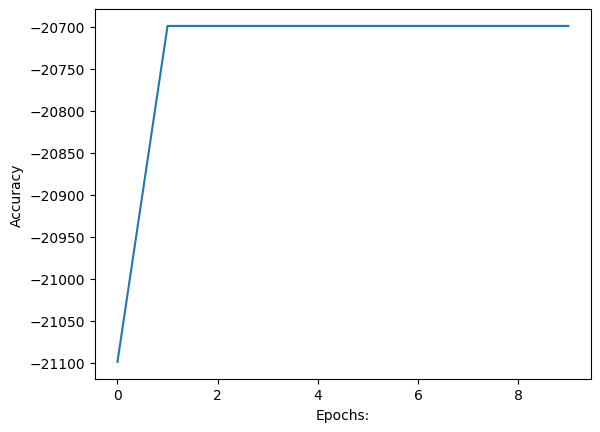

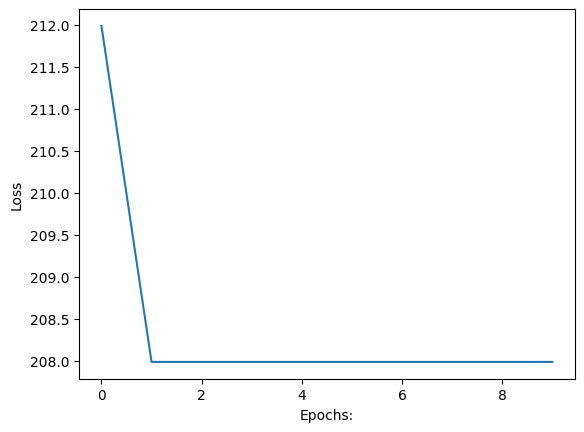

In [52]:
plt.plot(acc_Bin)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# plotting Loss
plt.plot(losss_Bin)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

El numero en la imagen es el:
0


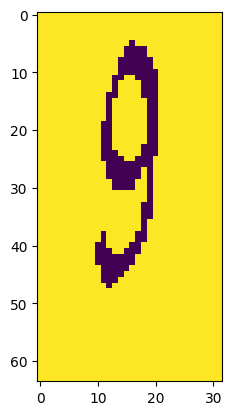

In [57]:
predict(X_test_Bin[30], w1_Gris, w2_Gris)